<a href="https://colab.research.google.com/github/Eakiz04/MAT421/blob/main/ModuleH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module H - Eric Kizior

# 22.1 - ODE Initial Value Problem Statement

*    **Differential Equation:** is a relationship between a function, $f(x)$, its independent variable, $x$, and any number of its derivatives
*    **Ordinary Differential Equation (ODE):** A differential equation where the independent variable and the derivatives, is in one dimension
*    **$n^{th}$ Order ODE:** $F(x,f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, ..., \frac{d^{n-1}f(x)}{dx^{n-1}})=\frac{d^nf(x)}{dx^n}$, where $F$ is an arbitrary function that incorporates one or all of the input arguments, and $n$ is the order
*    **General Solution:** A $g(x)$ that satisfies the differential equation
*    **Particular Solution:** A $p(x)$ that satisfies the differential equation and $n$ explicitly known values of the solution, or its derivatives, at certain points. $p^{(j)}(x_i)=p_i$ where $p^{(j)}$ is the $j{th}$ derivative of $p$, for $n$ triplets, $(j,x_i,p_i)$
*    **Initial Value:** A common set of known values for an ODE solution. For an ODE of order $n$, the initial value is a known value for the $0^{th}$ to $(n-1)^{th}$ derivatives at $x=0, f(0), f^{(1)}(0), f^{(2)}(0), ..., f^{(n-1)}(0)$. Finding a solution to an ODE given an initial value is called the **initial value problem**

# 22.2 - Reduction of Order

*    To make solvers, that are specifically designed to solve first-order ODE, useful for solving higher order differential equations, the order of the differential equation must be **reduced to first order**
*    **State:** To reduce the order of a differential equation, consider a vector, $S(t)$, which is the **state** of the system as a function of time. In general, the state of a system is a collection of all the dependent variables that are relevant to the behavior of the system.

$\hspace{3cm} S(t)= \begin{bmatrix}
f(t) \\
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
... \\
f^{(n-1)}(t)
\end{bmatrix} ⇒ \frac{dS(t)}{dt}= \begin{bmatrix}
f^{(1)}(t) \\
f^{(2)}(t) \\
f^{(3)}(t) \\
f^{(4)}(t) \\
... \\
f^{(n)}(t)
\end{bmatrix} = \begin{bmatrix}
S_2(t) \\
S_3(t) \\
S_4(t) \\
S_5(t) \\
... \\
F(t, S_1(t), S_2(t), ..., S_{n-1}(t))
\end{bmatrix}$

*    $S_i(t)$ is the $i^{th}$ element of $S(t)$. $\frac{dS(t)}{dt}= 𝓕(t,S(t))$, where 𝓕 is  a function that appropriately assembles the vector describing the derivative of the state. This equation is in the form of a first-order differential equation in $S$ (Convereted $n^{th}$ order to first order).

# 22.3 - The Euler Method

*    **Explicit Euler Formula:** Let $\frac{dS(t)}{dt}= F(t,S(t))$ be an explicitly defined first order ODE and $t$ be a numerical grid of the interval $[t_0,t_f]$ with spacing $h$. Without loss of generality, assume that $t_0=0$ and $t_f=Nh$ for some positive integer $N$. The linear approx. of $S(t)$ around %t_j% at $t_{j+1}$ is $S(t_{j+1}) = S(t_j)+(t_{j+1}-t_j) \frac{dS(t_j)}{dt}) = S(t_j) + hF(t_j, S(t_j))$
*    **Integration:** Using the above formula, starting from a given initial value of $S_0=S(t_0)$, integrate the states up to $S(t_f)$, those values are then an approximation for the solution of the differential equation.
*    **Implicit Euler Formula:** Derived by taking the linear approximation of $S(t)$ around $t_{j+1}$ and computing at $t_j$, which is  $S(t_{j+1}) = S(t_j) + hF(t_{j+1}, S(t_{j+1}))$.
*    **Trapezoidal Formule:** The average of the implicit and explicit Euler Formulas, $S(t_{j+1}) = S(t_j) + \frac{h}{2} (F(t_j, S(t_j))) + F(t_{j+1}, S(t_{j+1}))$

Example: $\frac{df(t)}{dt}= cos(x)$ with $f_0=1$ and exact solution $sin(t) + 1$. Approx. the solution to this initial value problem between 0 and 2 in increments of 0.05 using the Explicity Euler Formula.

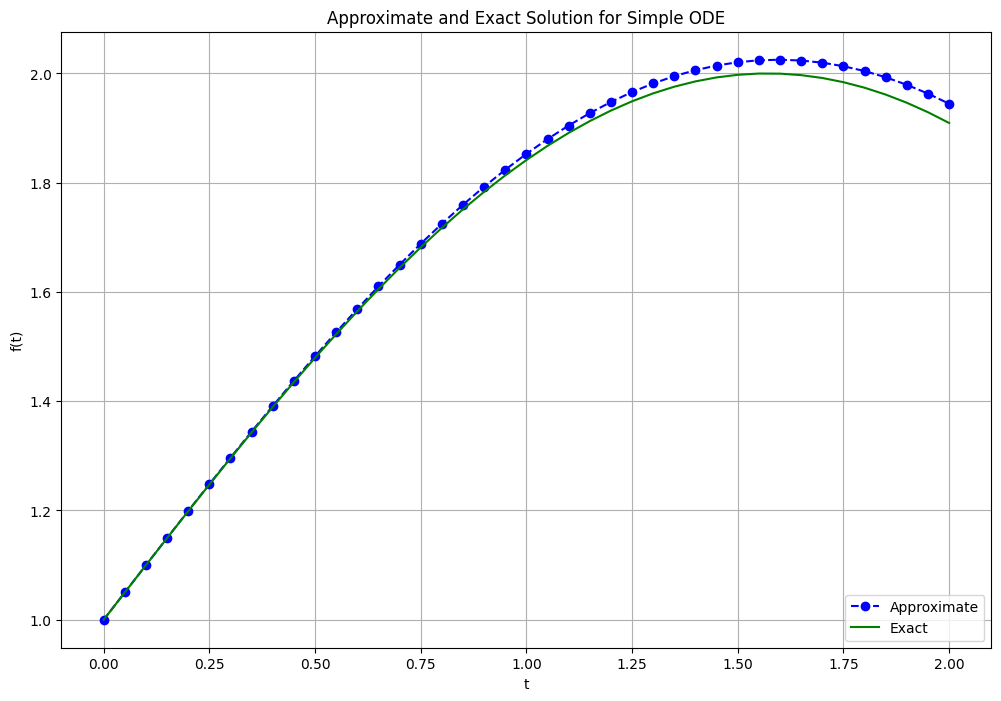

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Define parameters
f = lambda t, s: np.cos(t)  # ODE
h = 0.05 # Step size
t = np.arange(0, 2 + h, h) # Numerical grid
s0 = 1 # Initial Condition

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, np.sin(t) + 1, 'g', label='Exact')
plt.title('Approximate and Exact Solution \
for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

Note: The Approximation becomes more accurate the smaller the $h$